In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Importing modules...")

Importing modules...


In [2]:
df = pd.read_csv("fileSize.txt", delim_whitespace = True, header = None, names=["Quantity","Size"])
print("Reading data...")

Reading data...


In [3]:
print("Printing data...")
print(df)

Printing data...
      Quantity       Size
0        26326          0
1         2031          1
2         1097          2
3          834          3
4         8887          4
5          874          5
6          637          6
7          545          7
8         9855          8
9          278          9
10         242         10
11         156         11
12        7550         12
13         129         13
14         137         14
15         124         15
16        4696         16
17          85         17
18         138         18
19         118         19
20        3453         20
21         102         21
22         104         22
23         108         23
24        2791         24
25         148         25
26         154         26
27         178         27
28        2324         28
29         147         29
...        ...        ...
3127         1    2691188
3128         1    2698160
3129         1    2927564
3130         1    2931836
3131         1    3155260
3132         1    370

In [4]:
def mean(data):
    meanValue = 0
    dataLen = len(data)
    for index in range(dataLen):
        meanValue += data[index]

    return meanValue / dataLen

print("O valor da média dos tamanhos de arquivos é: " + str(mean(df["Size"])))

O valor da média dos tamanhos de arquivos é: 518226.67627494456


In [5]:
def variance(data):
    varianceValue = 0
    meanValue = mean(data)
    dataLen = len(data)
    for index in range(dataLen):
        varianceValue += (data[index] - meanValue) ** 2
        
    return varianceValue / dataLen

print("O valor da variância dos tamanhos de arquivos é: " + str(variance(df["Size"])))

O valor da variância dos tamanhos de arquivos é: 79157065131817.33


In [6]:
def standardDeviation(data):
    deviationValue = 0
    deviationValue = variance(data) ** 0.5
    return deviationValue

print("O valor do desvio padrão dos tamanhos de arquivos é: " + str(standardDeviation(df["Size"])))

O valor do desvio padrão dos tamanhos de arquivos é: 8897025.63398675


In [7]:
def coefficientOfVariation(data):
    coefficientOfVariationValue = 0
    coefficientOfVariationValue = standardDeviation(data) / mean(data)
    return coefficientOfVariationValue

print("O valor do coeficiente de variação dos tamanhos de arquivos é: " + str(coefficientOfVariation(df["Size"])))

O valor do coeficiente de variação dos tamanhos de arquivos é: 17.16821236980561


In [8]:
def median(data):
    data = np.sort(data)
    medianValue = 0
    dataLen = len(data)
    centerPoint = dataLen / 2
    if dataLen % 2 != 0:
        centerPoint = int(centerPoint + 0.5)
        medianValue = data[centerPoint - 1]
    else:
        centerPoint = int(centerPoint)
        medianValue = (data[centerPoint - 1] + data[centerPoint]) / 2
    
    return medianValue

print("O valor da mediana dos tamanhos de arquivos é: " + str(median(df["Size"])))

O valor da mediana dos tamanhos de arquivos é: 4188


In [9]:
def quartile(x,data):
    data = np.sort(data)
    quartileValue = 0
    dataLen = len(data)
    if x == 1:
        position = np.round(0.25 * (dataLen + 1))
        quartileValue = data[int(position - 1)]
    elif x == 2:
        quartileValue = median(data)
    elif x == 3:
        position = np.round(0.75 * (dataLen + 1))
        quartileValue = data[int(position - 1)]
    return quartileValue

print("O 1º quartil dos tamanhos de arquivos é: " + str(quartile(1,df["Size"])))
print("O 2º quartil(mediana) dos tamanhos de arquivos é: " + str(quartile(2,df["Size"])))
print("O 3º quartil dos tamanhos de arquivos é: " + str(quartile(3,df["Size"])))

O 1º quartil dos tamanhos de arquivos é: 1176
O 2º quartil(mediana) dos tamanhos de arquivos é: 4188
O 3º quartil dos tamanhos de arquivos é: 15292


In [10]:
def interquartileRange(data):
    return quartile(3,data) - quartile(1,data)

print("A amplitude interquartil dos tamanhos de arquivos é: " + str(interquartileRange(df["Size"])))

A amplitude interquartil dos tamanhos de arquivos é: 14116


A seguir o plot da PDF.


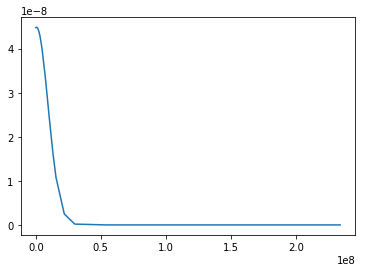

In [11]:
def normal(mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs((val-mean) ** 2)
    b = np.exp(-(diff)/(2*std*std))
    return a*b

def pdf(data):
    x = np.sort(data)
    meanValue = mean(data)
    std = standardDeviation(data)
    y = []
    for i in x:
        y.append(normal(meanValue,std,i))
    plt.plot(x,y, label = 'PDF')
    plt.show()

print("A seguir o plot da PDF.")
pdf(df["Size"])

A seguir o plot da CDF.


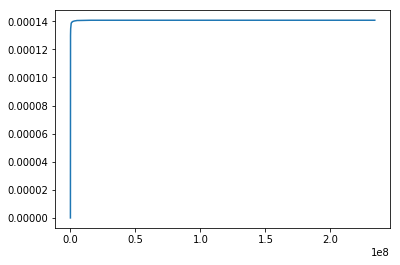

In [12]:
def cdf(data):
    x = np.sort(data)
    meanValue = mean(data)
    std = standardDeviation(data)
    y = []
    yCumulative = 0
    for i in x:
        norm = normal(meanValue,std,i)
        yCumulative += norm
        y.append(yCumulative)
    plt.plot(x,y, label = 'CDF')
    plt.show()
    
print("A seguir o plot da CDF.")
cdf(df["Size"])